<a href="https://www.kaggle.com/code/shababmahmood/bakery-sale-cleaning-and-analysis?scriptVersionId=162048946" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bakery-sales/Bakery Sales.csv
/kaggle/input/bakery-sales/Bakery price.csv


We begin this analysis with importing the proper libraries and datasets

In [2]:
file_path = '/kaggle/input/bakery-sales/Bakery Sales.csv'
df = pd.read_csv(file_path)

We do a brief check using the .head() function

In [3]:
df.head()

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,...,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now gather info on the data types and number of missing values. In order to maintain the integrity of the dataset and to get accurate results, we should aim to drop as little data as possible.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

Given that there are many null values among the different product columns, and those columns are about the quantity sold at different times, if the value is missing, it is safe to assume that 0 units of those products were sold at those times. With this assumption in mind, I intend to replace all missing values with 0

In [5]:
columns_to_replace = ['angbutter', 'plain bread', 'jam', 'americano', 'croissant', 'caffe latte', 'tiramisu croissant', 'cacao deep', 'pain au chocolat', 'almond croissant', 'croque monsieur', 'mad garlic', 'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake', 'lemon ade', 'orange pound', 'wiener', 'vanila latte', 'berry ade','tiramisu', 'merinque cookies']
df[columns_to_replace] = df[columns_to_replace].fillna(0)
df.isnull().sum()

datetime              233
day of week           234
total                 234
place                 488
angbutter               0
plain bread             0
jam                     0
americano               0
croissant               0
caffe latte             0
tiramisu croissant      0
cacao deep              0
pain au chocolat        0
almond croissant        0
croque monsieur         0
mad garlic              0
milk tea                0
gateau chocolat         0
pandoro                 0
cheese cake             0
lemon ade               0
orange pound            0
wiener                  0
vanila latte            0
berry ade               0
tiramisu                0
merinque cookies        0
dtype: int64

I next wanted to check the total column and understand why there are missing values. I looked at the rows where total is missing. What it shows is that the day of the week, date/time, and place are missing, plus no sales were made at all at those times. What this means for me is that I will now replace the missing total values with 0.

In [6]:
rows_with_nan_total = df[df['total'].isna()]

pd.set_option('display.max_columns', None)
print(rows_with_nan_total)
pd.reset_option('display.max_columns')

              datetime day of week  total place  angbutter  plain bread  jam  \
2420               NaN         NaN    NaN   NaN        0.0          0.0  0.0   
2421               NaN         NaN    NaN   NaN        0.0          0.0  0.0   
2422               NaN         NaN    NaN   NaN        0.0          0.0  0.0   
2423               NaN         NaN    NaN   NaN        0.0          0.0  0.0   
2424               NaN         NaN    NaN   NaN        0.0          0.0  0.0   
...                ...         ...    ...   ...        ...          ...  ...   
2649               NaN         NaN    NaN   NaN        0.0          0.0  0.0   
2650               NaN         NaN    NaN   NaN        0.0          0.0  0.0   
2651               NaN         NaN    NaN   NaN        0.0          0.0  0.0   
2652               NaN         NaN    NaN   NaN        0.0          0.0  0.0   
2653  2020-06-18 14:52         NaN    NaN   NaN        0.0          0.0  0.0   

      americano  croissant  caffe latte

In [7]:
df['total'] = df['total'].fillna(0)
df.isnull().sum()

datetime              233
day of week           234
total                   0
place                 488
angbutter               0
plain bread             0
jam                     0
americano               0
croissant               0
caffe latte             0
tiramisu croissant      0
cacao deep              0
pain au chocolat        0
almond croissant        0
croque monsieur         0
mad garlic              0
milk tea                0
gateau chocolat         0
pandoro                 0
cheese cake             0
lemon ade               0
orange pound            0
wiener                  0
vanila latte            0
berry ade               0
tiramisu                0
merinque cookies        0
dtype: int64

I am looking at the 'place' column. I can either drop this column all together for my analysis, or I can just replace the missing values with unknown. I will do the latter.

In [8]:
print(df['place'].unique())
print(df['place'].value_counts())

[nan '효자 3동' '후평 1동' '후평 2동' '석사동' '소양동' '퇴계동' '동면' '후평 3동' '신사우동' '강남동'
 '효자 1동' '조운동' '교동' '효자 2동' '약사명동' '근화동' '동내면' '교동 ' '신동면']
place
동면       416
후평 2동    254
후평 3동    249
후평 1동    196
석사동      169
퇴계동      146
효자 2동    143
소양동      132
신사우동      91
효자 3동     80
교동        65
강남동       52
효자 1동     50
조운동       37
동내면       31
근화동       29
약사명동      23
교동         2
신동면        1
Name: count, dtype: int64


In [9]:
df['place'].fillna('Unknown', inplace = True)
print(df.isnull().sum())

datetime              233
day of week           234
total                   0
place                   0
angbutter               0
plain bread             0
jam                     0
americano               0
croissant               0
caffe latte             0
tiramisu croissant      0
cacao deep              0
pain au chocolat        0
almond croissant        0
croque monsieur         0
mad garlic              0
milk tea                0
gateau chocolat         0
pandoro                 0
cheese cake             0
lemon ade               0
orange pound            0
wiener                  0
vanila latte            0
berry ade               0
tiramisu                0
merinque cookies        0
dtype: int64


Lastly, I now have the 'day of week', and 'datetime' column. For this I will be replacing the the missing values with the mode of 'day of week', and drop rows where there are missing values in 'datetime', and create a new column with only the dates. Ideally I would want to keep those rows. But they are getting in the way of the analysis and so I will have to get rid of them.

In [10]:
day_mode = df['day of week'].mode()[0]
df['day of week'].fillna(day_mode, inplace = True)
print(df.isnull().sum())

datetime              233
day of week             0
total                   0
place                   0
angbutter               0
plain bread             0
jam                     0
americano               0
croissant               0
caffe latte             0
tiramisu croissant      0
cacao deep              0
pain au chocolat        0
almond croissant        0
croque monsieur         0
mad garlic              0
milk tea                0
gateau chocolat         0
pandoro                 0
cheese cake             0
lemon ade               0
orange pound            0
wiener                  0
vanila latte            0
berry ade               0
tiramisu                0
merinque cookies        0
dtype: int64


I want to just use the date,month,and year and not the time for convinience so I made another column with the dates only.

In [11]:
df['datetime'] = df['datetime'].replace('Unknown', pd.NaT)
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df = df.dropna(subset=['date'])
df.drop('datetime', axis=1, inplace=True)

Now that the missing values have been dealt with, let's do some EDA.

In [12]:
print(df.info())
print(df.describe())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 2421 entries, 0 to 2653
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   day of week         2421 non-null   object 
 1   total               2421 non-null   float64
 2   place               2421 non-null   object 
 3   angbutter           2421 non-null   float64
 4   plain bread         2421 non-null   float64
 5   jam                 2421 non-null   float64
 6   americano           2421 non-null   float64
 7   croissant           2421 non-null   float64
 8   caffe latte         2421 non-null   float64
 9   tiramisu croissant  2421 non-null   float64
 10  cacao deep          2421 non-null   float64
 11  pain au chocolat    2421 non-null   float64
 12  almond croissant    2421 non-null   float64
 13  croque monsieur     2421 non-null   float64
 14  mad garlic          2421 non-null   float64
 15  milk tea            2421 non-null   float64
 16  gateau choc

Let's make histograma highlighting what day and month usually sees the most business. In this case, it would be sunday and the month of march.

<Axes: xlabel='day of week', ylabel='Count'>

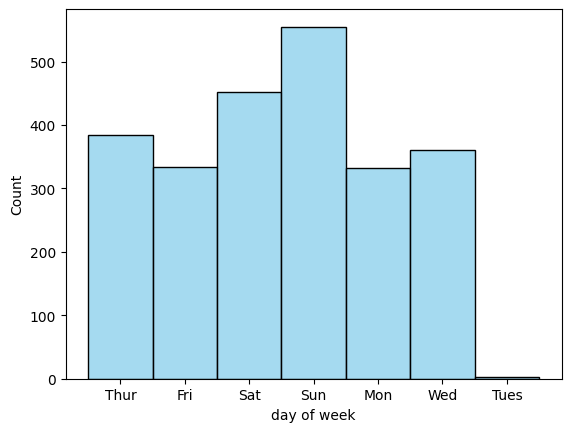

In [13]:
sns.histplot(df['day of week'], bins=8, kde=False, color='skyblue', edgecolor='black')

<Axes: xlabel='month', ylabel='Count'>

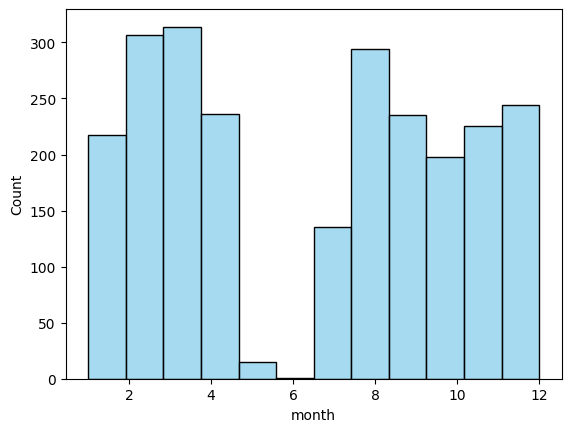

In [14]:
sns.histplot(df['month'], bins=12, kde=False, color='skyblue', edgecolor='black')

There was no activity during the month of june. This is also shown in other graphs such as the bottom two where, we are showing the average sales per. month. What it shows is that while march may have had the most activity, it did not have the highest sales. That award goes to July.

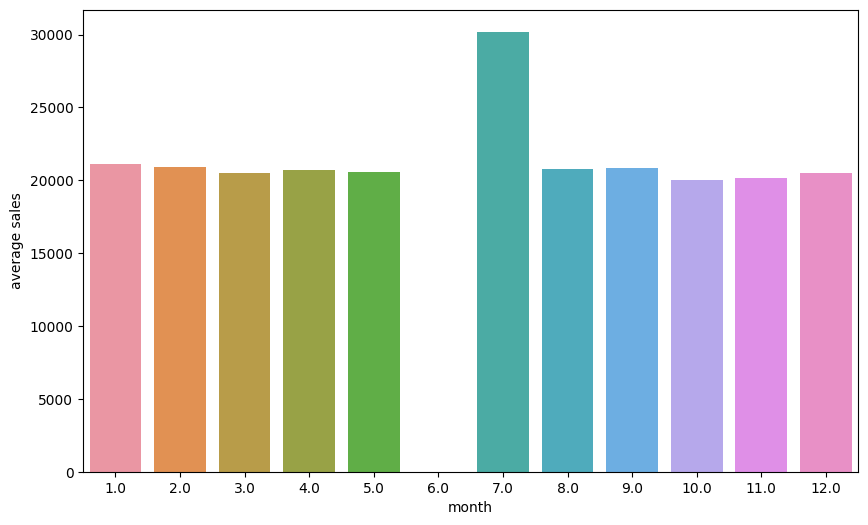

In [15]:
avg_sales_per_month = df.groupby('month')['total'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total', data=avg_sales_per_month)
plt.xlabel("month")
plt.ylabel("average sales")
plt.show()

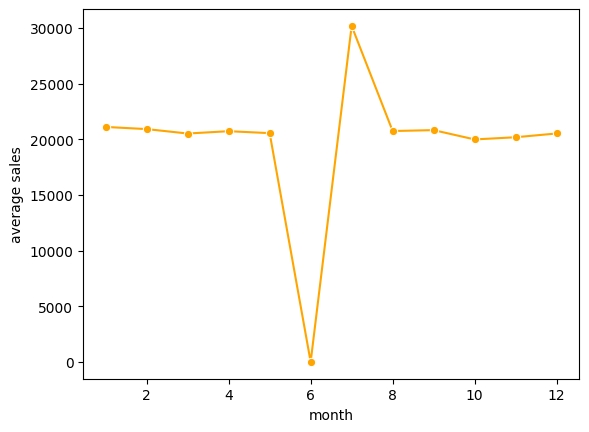

In [16]:
sns.lineplot(x='month', y='total', data=avg_sales_per_month, color='orange', marker='o')
plt.xlabel("month")
plt.ylabel("average sales")
plt.show()

Here we look for the products that sold the most units each month. This changes from month to month. Doing this analysis, it shows that angbutter is the most popular item. The other four items may change positions, or lose their spot for a month, but they are consistently in the top 5 for more months in the year. Those being croissant, tiramisu croissant, pain au chocolat, and plain bread.

In [17]:
products = ['tiramisu', 'angbutter', 'plain bread', 'jam', 'americano', 
            'croissant', 'caffe latte', 'tiramisu croissant', 'cacao deep', 
            'pain au chocolat', 'almond croissant', 'croque monsieur', 
            'mad garlic', 'milk tea', 'gateau chocolat', 'pandoro', 'cheese cake',
            'lemon ade', 'orange pound', 'wiener', 'vanila latte', 'berry ade',
            'merinque cookies']

total_units_sold_per_month = df.groupby('month')[products].sum().reset_index()
top_5_sellers_per_month = total_units_sold_per_month.melt(id_vars=['month'], value_vars=products, 
                                                     var_name='Product', value_name='Total Units Sold') \
                                             .groupby('month') \
                                             .apply(lambda x: x.nlargest(5, 'Total Units Sold'))

top_5_sellers_per_month

month             Product  Total Units Sold
month                                                 
1.0   12     1.0           angbutter             300.0
      84     1.0  tiramisu croissant              99.0
      24     1.0         plain bread              97.0
      60     1.0           croissant              79.0
      216    1.0        orange pound              52.0
2.0   13     2.0           angbutter             391.0
      25     2.0         plain bread             137.0
      61     2.0           croissant             128.0
      85     2.0  tiramisu croissant             111.0
      49     2.0           americano              86.0
3.0   14     3.0           angbutter             403.0
      26     3.0         plain bread             172.0
      86     3.0  tiramisu croissant             132.0
      62     3.0           croissant             120.0
      110    3.0    pain au chocolat              91.0
4.0   15     4.0           angbutter             311.0
      87     4.0  tiramisu croissant             113.0
      27     4.0         plain bread             105.0
      63     4.0           croissant              99.0
      111    4.0    pain au chocolat              69.0
5.0   16     5.0           angbutter              19.0
      88     5.0  tiramisu croissant               9.0
      64     5.0           croissant               6.0
      28     5.0         plain bread               5.0
      52     5.0           americano               5.0
6.0   5      6.0            tiramisu               0.0
      17     6.0           angbutter               0.0
      29     6.0         plain bread               0.0
      41     6.0                 jam               0.0
      53     6.0           americano               0.0
7.0   18     7.0           angbutter             187.0
      66     7.0           croissant              80.0
      90     7.0  tiramisu croissant              65.0
      114    7.0    pain au chocolat              47.0
      30     7.0         plain bread              40.0
8.0   19     8.0           angbutter             430.0
      67     8.0           croissant             151.0
      31     8.0         plain bread             105.0
      115    8.0    pain au chocolat             101.0
      235    8.0              wiener              98.0
9.0   20     9.0           angbutter             337.0
      68     9.0           croissant             113.0
      32     9.0         plain bread              79.0
      116    9.0    pain au chocolat              79.0
      92     9.0  tiramisu croissant              76.0
10.0  21    10.0           angbutter             249.0
      69    10.0           croissant              92.0
      117   10.0    pain au chocolat              80.0
      33    10.0         plain bread              71.0
      93    10.0  tiramisu croissant              68.0
11.0  22    11.0           angbutter             288.0
      34    11.0         plain bread             116.0
      70    11.0           croissant              92.0
      94    11.0  tiramisu croissant              78.0
      118   11.0    pain au chocolat              62.0
12.0  23    12.0           angbutter             314.0
      95    12.0  tiramisu croissant             117.0
      35    12.0         plain bread             101.0
      71    12.0           croissant              89.0
      119   12.0    pain au chocolat              67.0

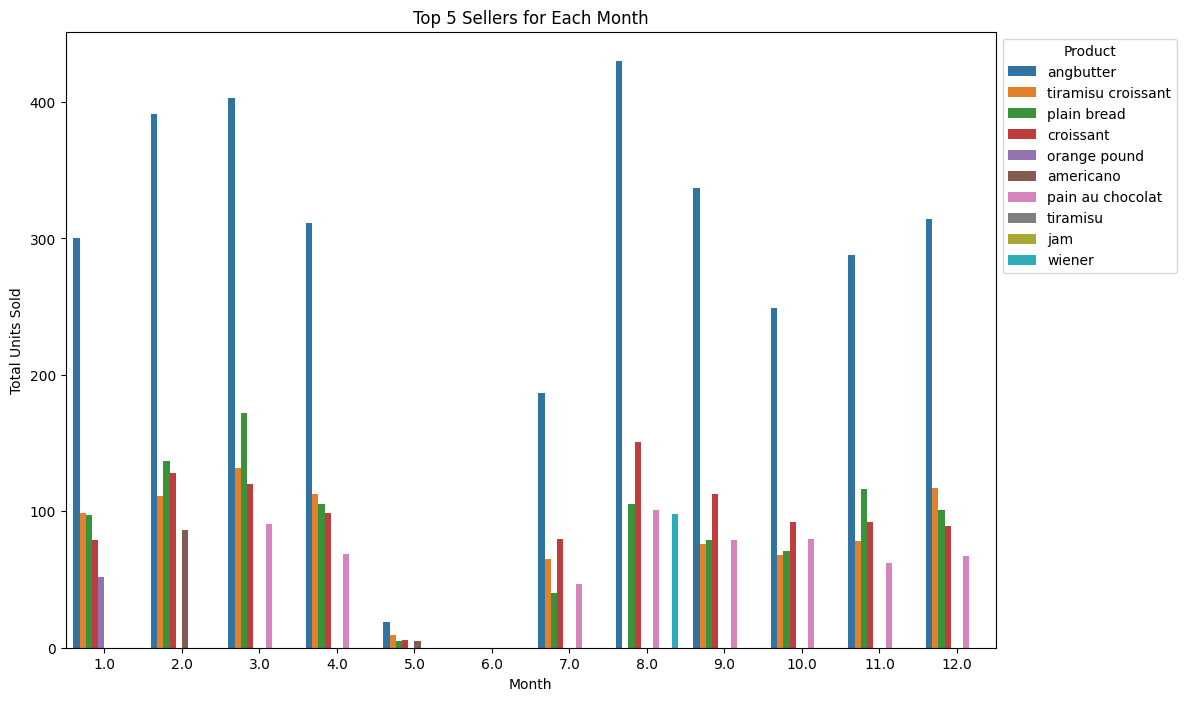

In [18]:
plt.figure(figsize=(12, 8))

sns.barplot(x='month', y='Total Units Sold', hue='Product', data=top_5_sellers_per_month)

plt.xlabel("Month")
plt.ylabel("Total Units Sold")
plt.title("Top 5 Sellers for Each Month")

plt.legend(title='Product', bbox_to_anchor=(1, 1))

plt.show()

Now let's look at the places that these orders are going to. Many of these orders are going somewhere unknown. While others are going to various places. Although the korean names cannot be shown.

/tmp/ipykernel_42/2643857715.py:10: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_42/2643857715.py:10: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_42/2643857715.py:10: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_42/2643857715.py:10: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_42/2643857715.py:10: UserWarning: Glyph 49437 (\N{HANGUL SYLLABLE SEOG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_42/2643857715.py:10: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_42/2643857715.py:10: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_42/2643857715.py:10: UserWarning: G

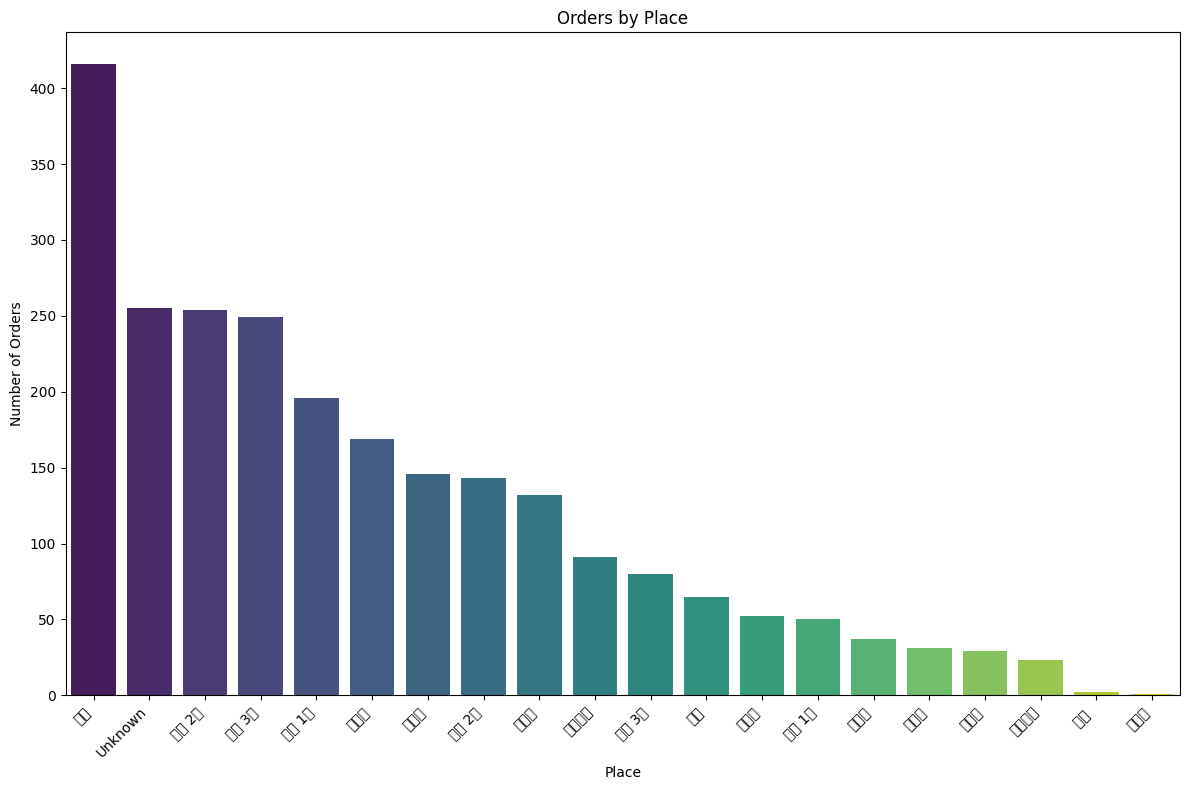

In [19]:
# Assuming 'place' is the column containing place names
plt.figure(figsize=(12, 8))
sns.countplot(x='place', data=df, order=df['place'].value_counts().index, palette='viridis')

plt.xlabel("Place")
plt.ylabel("Number of Orders")
plt.title("Orders by Place")

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()